In [8]:
import pandas as pd
df = pd.read_csv("fraud-detection/FraudData.csv")


#  check for shape of  dataset

In [9]:
print("Shape:", df.shape)


Shape: (1852394, 23)


#  check for column names

In [10]:
print("nColumns:", df.columns)


nColumns: Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')


#  check for data types

In [5]:
print("\nData Types:", df.dtypes)


Data Types: Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


In [15]:
 # see some data 
df.head()

,Unnamed: 0,cc_num,merchant,category,amt,first,last,gender,street,city,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,weekday
0,0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,0,1,1
1,1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,0,1,1
2,2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,0,1,1
3,3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,0,1,1
4,4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,0,1,1


#  convert date time

In [30]:
print("\nData Types:", df.dtypes)


Data Types: Unnamed: 0      int64
cc_num          int64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob            object
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
hour            int32
day             int32
weekday         int32
dtype: object


# genral statistics

In [21]:
print(df.describe())


         Unnamed: 0        cc_num           amt           zip           lat  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean   5.371934e+05  4.173860e+17  7.006357e+01  4.881326e+04  3.853931e+01   
std    3.669110e+05  1.309115e+18  1.592540e+02  2.688185e+04  5.071470e+00   
min    0.000000e+00  6.041621e+10  1.000000e+00  1.257000e+03  2.002710e+01   
25%    2.315490e+05  1.800429e+14  9.640000e+00  2.623700e+04  3.466890e+01   
50%    4.630980e+05  3.521417e+15  4.745000e+01  4.817400e+04  3.935430e+01   
75%    8.335758e+05  4.642255e+15  8.310000e+01  7.204200e+04  4.194040e+01   
max    1.296674e+06  4.992346e+18  2.894890e+04  9.992100e+04  6.669330e+01   

               long      city_pop     unix_time     merch_lat    merch_long  \
count  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06  1.852394e+06   
mean  -9.022783e+01  8.864367e+04  1.358674e+09  3.853898e+01 -9.022794e+01   
std    1.374789e+01  3.014876e+05  1.819508e+07  5.

TypeError: 'Series' object is not callable

# removing unnecessary column not needed for our analysis.

In [31]:
df.drop(['Unnamed: 0', 'first', 'last', 'street', 'dob', 'trans_num', 'unix_time'], axis=1, inplace=True)


# checking the missing values


In [32]:
#  check for missing values
print(df.isnull().sum())


cc_num        0
merchant      0
category      0
amt           0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
hour          0
day           0
weekday       0
dtype: int64


# count the targert variable in percentage

In [33]:
print(df['is_fraud'].value_counts())
print(df['is_fraud'].value_counts(normalize=True))  # percentage


is_fraud
0    1842743
1       9651
Name: count, dtype: int64
is_fraud
0    0.99479
1    0.00521
Name: proportion, dtype: float64


In [24]:
print(df.nunique())


Unnamed: 0    1296675
cc_num            999
merchant          693
category           14
amt             60616
first             355
last              486
gender              2
street            999
city              906
state              51
zip               985
lat               983
long              983
city_pop          891
job               497
dob               984
trans_num     1852394
unix_time     1819583
merch_lat     1754157
merch_long    1809753
is_fraud            2
hour               24
day                31
weekday             7
dtype: int64


# Unique Values per Column

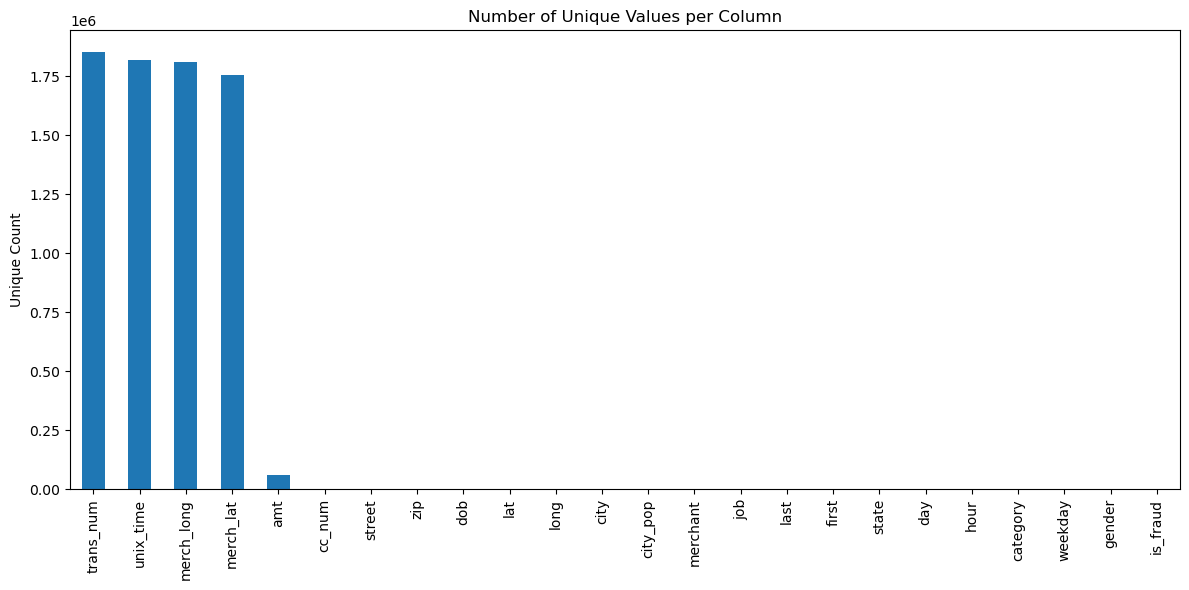

In [16]:
import matplotlib.pyplot as plt

df.nunique().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title('Number of Unique Values per Column')
plt.ylabel('Unique Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Distribution of Target Variable (is_fraud)

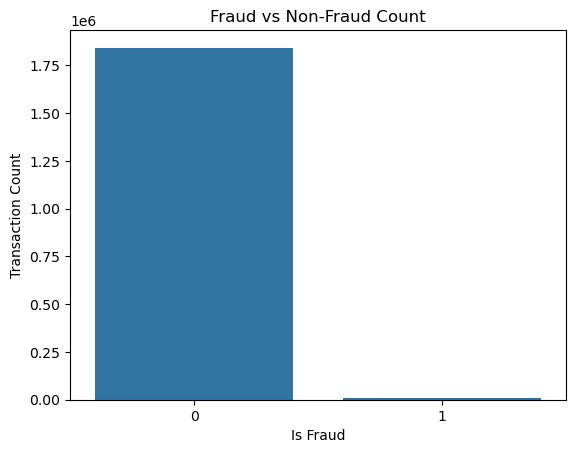

In [17]:
import seaborn as sns

sns.countplot(data=df, x='is_fraud')
plt.title('Fraud vs Non-Fraud Count')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Count')
plt.show()
